In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Load dataset
df = pd.read_excel("Final_Cleaned_Rekap_Penjualan_Kopi_Cucu_Eyang.xlsx")

# Mapping nama bulan Indonesia ke angka
bulan_mapping = {
    "Januari": 1, "Februari": 2, "Maret": 3, "April": 4,
    "Mei": 5, "Juni": 6, "Juli": 7, "Agustus": 8,
    "September": 9, "Oktober": 10, "November": 11, "Desember": 12
}

# Konversi nama bulan ke angka
df['Bulan_Numeric'] = df['Bulan'].map(bulan_mapping)

# One-hot encoding untuk variabel 'Menu'
df_encoded = pd.get_dummies(df[['Menu', 'Bulan_Numeric']], drop_first=True)

# Pilih variabel independen dan dependen
X = df_encoded
y = df['Terjual']

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bangun model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'R-squared: {r2}')

# Contoh prediksi penjualan untuk menu tertentu di bulan Oktober (10)
# Pilih salah satu menu sebagai contoh
sample_input = pd.DataFrame([[10]], columns=['Bulan_Numeric'])
sample_input = pd.concat([sample_input, pd.get_dummies(df['Menu'], drop_first=True).iloc[0:1]], axis=1).fillna(0)

# Pastikan kolom-kolom sample_input sesuai dengan model
sample_input = sample_input.reindex(columns=X_train.columns, fill_value=0)

# Prediksi penjualan
prediksi_penjualan = model.predict(sample_input)
print(f'Prediksi Penjualan: {prediksi_penjualan[0]} unit')


MAE: 5.36232036408118
R-squared: 0.8377623699658885
Prediksi Penjualan: 25.701409174439654 unit


In [ ]:
import pandas as pd

pizza = {'diameter' : [6,8,10,14,18],
         'harga' : [7, 9, 13, 17.5, 18]}

pizza_df = pd.DataFrame(pizza)
pizza_df

,diameter,harga
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,18.0


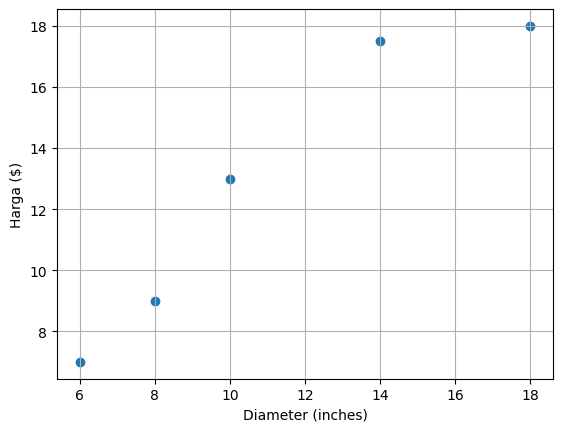

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(pizza_df['diameter'], pizza_df['harga'])

plt.xlabel('Diameter (inches)')
plt.ylabel('Harga ($)')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np

X = np.array(pizza_df['diameter'])
y = np.array(pizza_df['harga'])

X = X.reshape(-1, 1)
X


array([[ 6],
       [ 8],
       [10],
       [14],
       [18]])

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

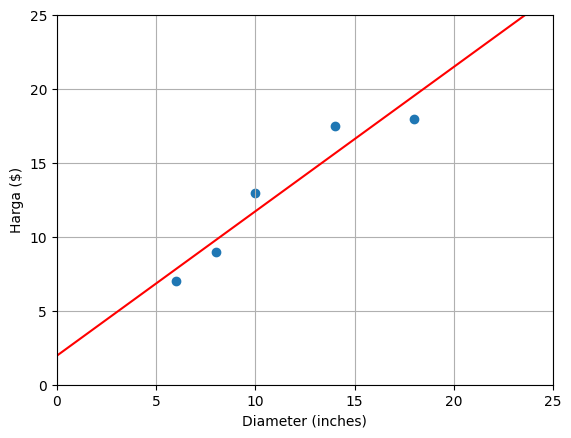

In [ ]:
X_vis = np.array([0, 25]).reshape(-1, 1)
y_vis = model.predict(X_vis)

plt.scatter(X, y)
plt.plot(X_vis, y_vis, c='r')

plt.xlabel('Diameter (inches)')
plt.ylabel('Harga ($)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

In [ ]:
print(f'intercept : {model.intercept_}')
print(f'slope : {model.coef_}')

intercept : 1.965517241379315
slope : [0.9762931]


In [ ]:
variance_x = np.var(X.flatten(), ddof = 1)
variance_x

23.2

In [ ]:
np.cov(X.flatten(), y)


array([[23.2 , 22.65],
       [22.65, 24.3 ]])

In [ ]:
covariance_xy = np.cov(X.flatten(), y)[0,1]

In [ ]:
slope = covariance_xy / variance_x
slope

0.976293103448276

In [ ]:
intercept = np.mean(y) - slope * np.mean(X)
intercept

1.9655172413793096

In [ ]:
diameter_pizza = np.array([12,20,23]).reshape(-1, 1)
prediksi_harga = model.predict(diameter_pizza)
prediksi_harga

array([13.68103448, 21.49137931, 24.42025862])

In [ ]:
for dmtr, hrg in zip(diameter_pizza, prediksi_harga):
    print(f'diameter pizza : {dmtr}, prediksi harga : {hrg}')

diameter pizza : [12], prediksi harga : 13.681034482758621
diameter pizza : [20], prediksi harga : 21.491379310344826
diameter pizza : [23], prediksi harga : 24.42025862068965
